### Importation des données et librairies 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_my_customer =pd.read_csv('df_my_customer.csv')
df_my_orders_futur =pd.read_csv('df_my_orders_futur.csv')


### MACHIN LEARNING
#### K-MEAN

#### 1 RFM

In [3]:
df_my_customer.columns

Index(['customer_unique_id', 'nbr_orders', 'payment_value', 'date_diff'], dtype='object')

In [4]:
#Préparation des données 
#uniquement des valeurs continues
df_my_customer_kmean = df_my_customer[['nbr_orders', 'payment_value', 'date_diff']]

In [5]:
df_my_customer_kmean.isna().sum()

nbr_orders       0
payment_value    0
date_diff        0
dtype: int64

In [6]:
len(df_my_customer_kmean)

94989

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_my_customer_kmean)
df_my_customer_kmean = scaler.transform(df_my_customer_kmean)

In [8]:
from sklearn.cluster import KMeans
from  sklearn import datasets

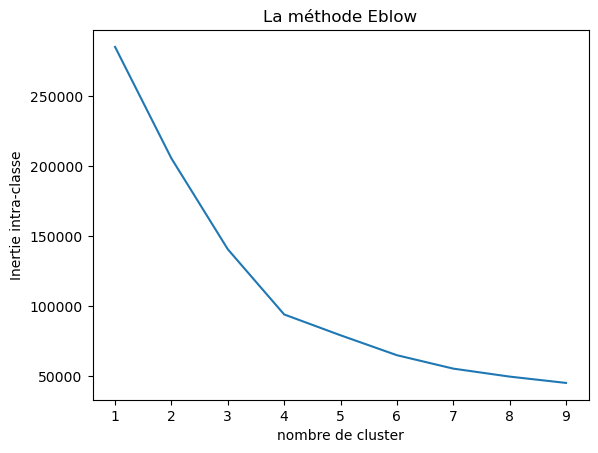

In [9]:
#Détermination de la valeur de K par la méthode d'Elbow (courbe de coude)
#Détermination de la valeur optimale de K
tab=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_my_customer_kmean)
    tab.append(kmeans.inertia_)
plt.plot(range(1,10),tab)
plt.title("La méthode Eblow")
plt.xlabel("nombre de cluster")
plt.ylabel("Inertie intra-classe")
plt.show()

==> nombre de cluster idéale 4

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


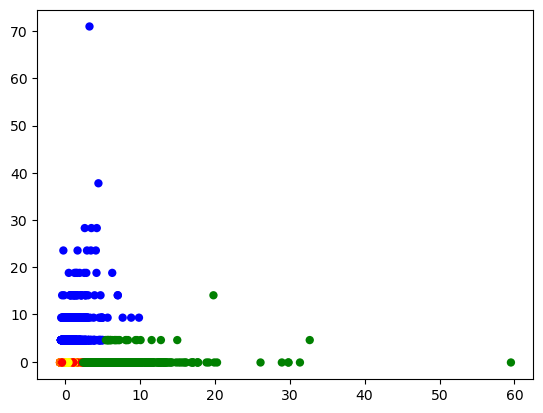

In [10]:
#Application deKMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_my_customer_kmean)


column_names =['nbr_orders', 'payment_value', 'date_diff']

df_my_customer_kmean = pd.DataFrame(df_my_customer_kmean,  columns=column_names)



df_my_customer_kmean['cluster']=kmeans.predict(df_my_customer_kmean)

#Visualisation
colormap=np.array(["red", "green", "blue","yellow"])
plt.scatter(df_my_customer_kmean['payment_value'],df_my_customer_kmean['nbr_orders'], c=colormap[kmeans.labels_], edgecolor='none')

plt.show()



In [11]:
df_my_customer_kmean.columns

Index(['nbr_orders', 'payment_value', 'date_diff', 'cluster'], dtype='object')

In [12]:
df_my_customer_kmean['cluster'].unique()

array([3, 0, 2, 1])

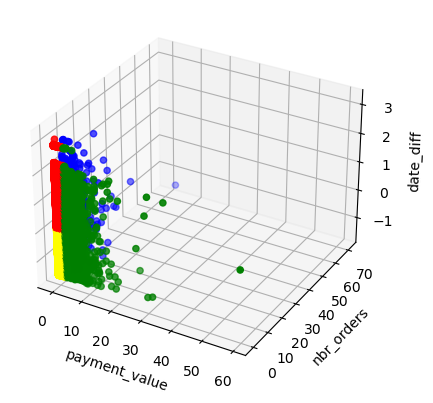

In [13]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colormap=np.array(["red", "green", "blue","yellow"])

ax.scatter(df_my_customer_kmean['payment_value'], df_my_customer_kmean['nbr_orders'],df_my_customer_kmean['date_diff'],c=colormap[kmeans.labels_])

ax.set_xlabel('payment_value')
ax.set_ylabel('nbr_orders')
ax.set_zlabel('date_diff')
plt.savefig('rfm3D.png')
plt.show()

In [14]:
df_my_customer_kmean['cluster'].value_counts()

3    51548
0    38054
2     2858
1     2529
Name: cluster, dtype: int64

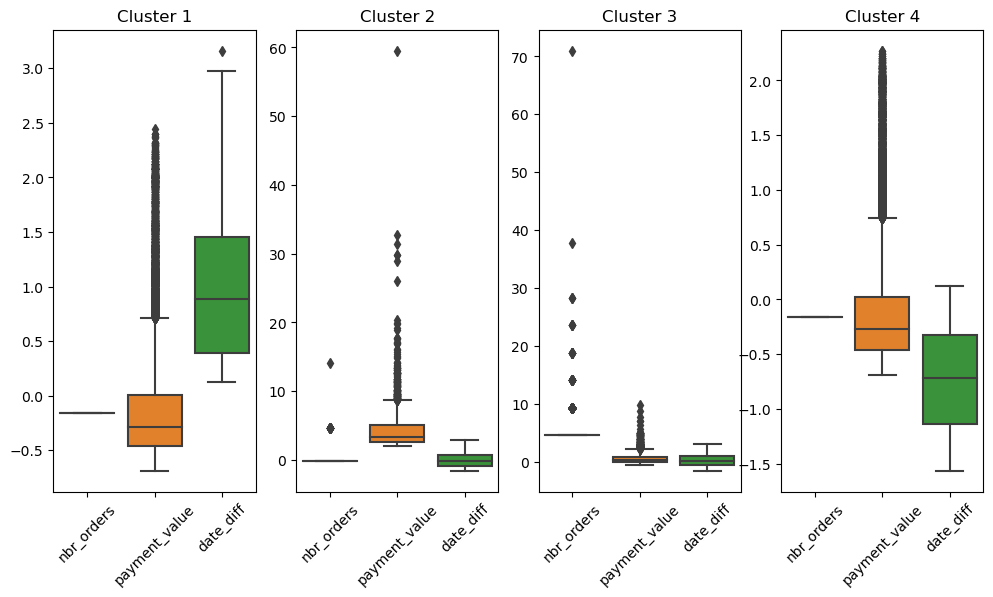

In [15]:
#Distribution des cluster 
plt.figure(figsize=(12, 6),dpi=100)

num_clusters=4
for i in range(num_clusters):
    plt.subplot(1, num_clusters, i + 1) 
    cluster_data = df_my_customer_kmean[df_my_customer_kmean['cluster'] == i][['nbr_orders', 'payment_value', 'date_diff']] 
    sns.boxplot(data=cluster_data)
    plt.xticks(rotation=45)
    plt.title(f'Cluster {i+1}') 
plt.savefig('rfmbasique4.png')
plt.show()

### Description métier:

#### Cluster 1 : Clients qui font des achats en petits montants mais régulièrement (tous les trois mois)
#### Cluster 2 : Clients qui font des petits achats très rarement ( + 1 an d'écart)
#### Cluster 3 : Clients qui font des achats en gros montants mais très rarement ( + 1 an d'écart)
#### Cluster 4 : Clients qui font des gros achats régulierement 




#### RFM + Review score

In [16]:
df_my_orders_futur.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp', 'payment_value',
       'payment_installments', 'customer_unique_id', 'review_score',
       'date_diff'],
      dtype='object')

In [17]:
df_RFM_S= df_my_orders_futur[['order_id', 'customer_id', 'order_purchase_timestamp', 'payment_value', 'customer_unique_id', 'review_score',
       'date_diff']]

In [18]:
df_RFM_S=df_RFM_S.groupby('customer_unique_id').agg({'order_id':'count','payment_value':'sum','date_diff':'first','review_score':'mean'})

In [19]:
df_RFM_S.rename(columns={'order_id':'nbr_orders'},inplace=True)

In [20]:
df_RFM_S.columns

Index(['nbr_orders', 'payment_value', 'date_diff', 'review_score'], dtype='object')

In [21]:
df_RFM_S.isna().sum()

nbr_orders         0
payment_value      0
date_diff          0
review_score     685
dtype: int64

In [22]:
df_RFM_S.dropna(inplace=True)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_RFM_S)
df_RFM_S = scaler.transform(df_RFM_S)

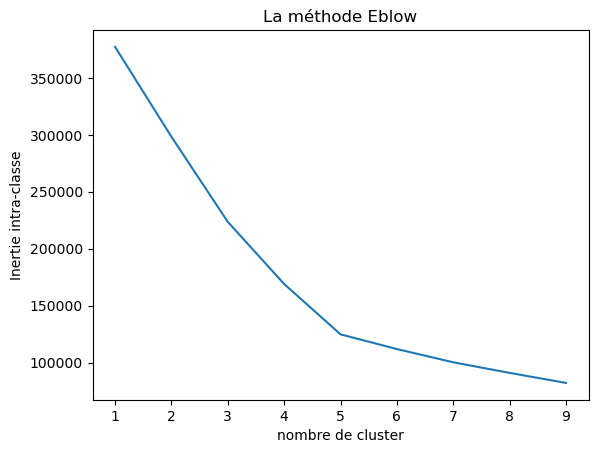

In [24]:
from sklearn.cluster import KMeans
from  sklearn import datasets
#Détermination de la valeur de K par la méthode d'Elbow (courbe de coude)
#Détermination de la valeur optimale de K
tab=[]
for i in range(1,10):
    kmeansS=KMeans(n_clusters=i)
    kmeansS.fit(df_RFM_S)
    tab.append(kmeansS.inertia_)
plt.plot(range(1,10),tab)
plt.title("La méthode Eblow")
plt.xlabel("nombre de cluster")
plt.ylabel("Inertie intra-classe")
plt.show()

In [25]:
#Application deKMeans
model = KMeans(n_clusters=5)
model.fit(df_RFM_S)

#transformer le resulats = np.array en Dataframe
column_names =['nbr_orders', 'payment_value', 'date_diff','review_score']

df_RFM_S = pd.DataFrame(df_RFM_S,  columns=column_names)


df_RFM_S['cluster']=model.predict(df_RFM_S)


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


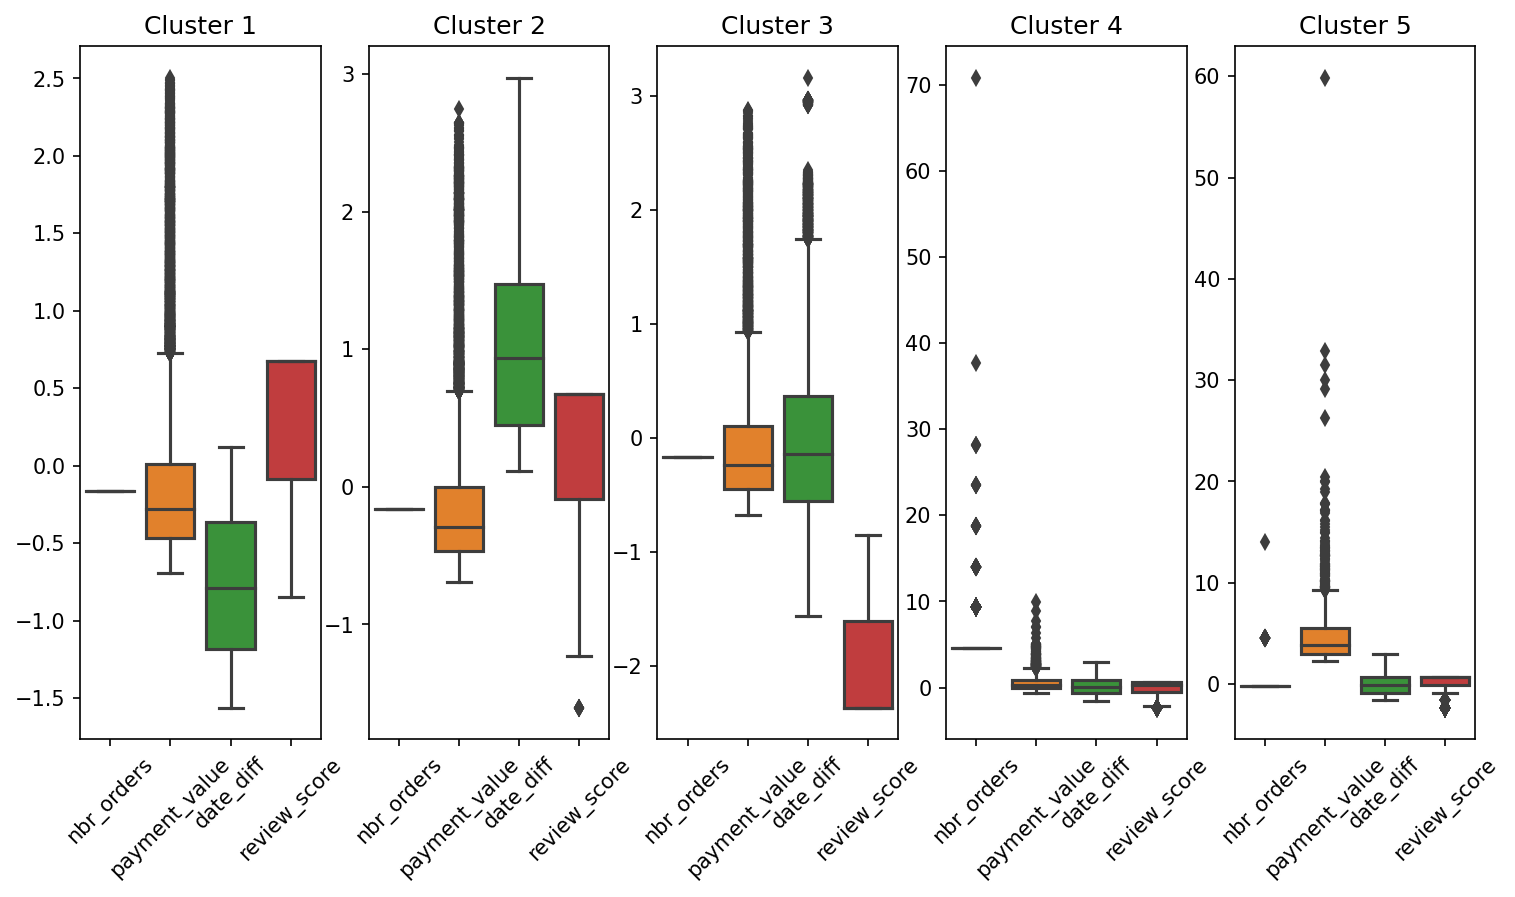

In [26]:
#Distribution des cluster 
plt.figure(figsize=(12, 6), dpi=150)

num_clusters=5
for i in range(num_clusters):
    plt.subplot(1, num_clusters, i + 1) 
    cluster_data = df_RFM_S[df_RFM_S['cluster'] == i][['nbr_orders', 'payment_value', 'date_diff','review_score']] 
    sns.boxplot(data=cluster_data) 
    plt.title(f'Cluster {i+1}') 
    plt.xticks(rotation=45)
plt.savefig('rfmReview.png')
plt.show()

cluster 1 : Clients avec des montants d'achats faibles mais très régulièrement et avec une  de Review score moyenne.

cluster 2 : Clients avec des montants d'achats très faibles et très rarement est avec une  de Review score extrêmement bas.

cluster 3 : Clients avec des montants d'achats importants et régulièrement est avec une  de Review score élevée.

cluster 4 : Clients avec des valeurs de paiement très élevées et très régulièrement et avec une  de Review score moyenne.

cluster 5 : Clients avec des montants d'achats moyennes mais  régulièrement et avec une  de Review score moyenne.

#### RFM + payment_installments

In [27]:
df_my_orders_futur.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp', 'payment_value',
       'payment_installments', 'customer_unique_id', 'review_score',
       'date_diff'],
      dtype='object')

In [28]:
df_RFM_P = df_my_orders_futur[['order_id', 'customer_id', 'order_purchase_timestamp', 'payment_value',
       'payment_installments', 'customer_unique_id',  'date_diff']]

In [29]:
df_RFM_P=df_RFM_P.groupby('customer_unique_id').agg({'order_id':'count','payment_value':'sum','date_diff':'first','payment_installments':'first'})

In [30]:
df_RFM_P.rename(columns={'order_id':'nbr_orders'},inplace=True)

In [31]:
df_RFM_P.isna().sum()

nbr_orders              0
payment_value           0
date_diff               0
payment_installments    0
dtype: int64

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_RFM_P)
df_RFM_P = scaler.transform(df_RFM_P)

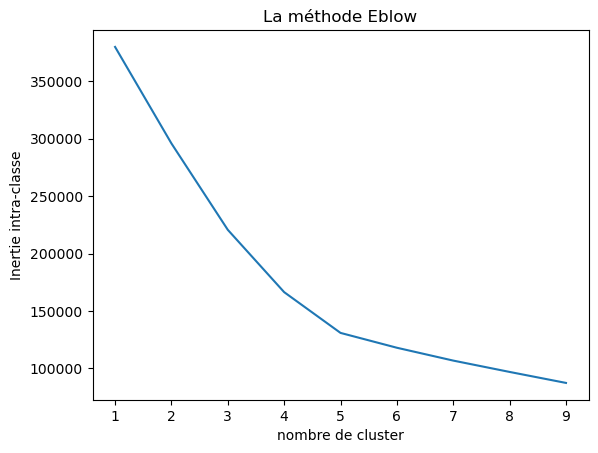

In [33]:
from sklearn.cluster import KMeans
from  sklearn import datasets
#Détermination de la valeur de K par la méthode d'Elbow (courbe de coude)
#Détermination de la valeur optimale de K
tab=[]
for i in range(1,10):
    kmeansP=KMeans(n_clusters=i)
    kmeansP.fit(df_RFM_P)
    tab.append(kmeansP.inertia_)
plt.plot(range(1,10),tab)
plt.title("La méthode Eblow")
plt.xlabel("nombre de cluster")
plt.ylabel("Inertie intra-classe")
plt.show()

In [34]:
#Application deKMeans
model = KMeans(n_clusters=5)
model.fit(df_RFM_P)

#transformer le resulats = np.array en Dataframe
column_names =['nbr_orders', 'payment_value', 'date_diff','payment_installments']

df_RFM_P = pd.DataFrame(df_RFM_P,  columns=column_names)


df_RFM_P['cluster']=model.predict(df_RFM_P)


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


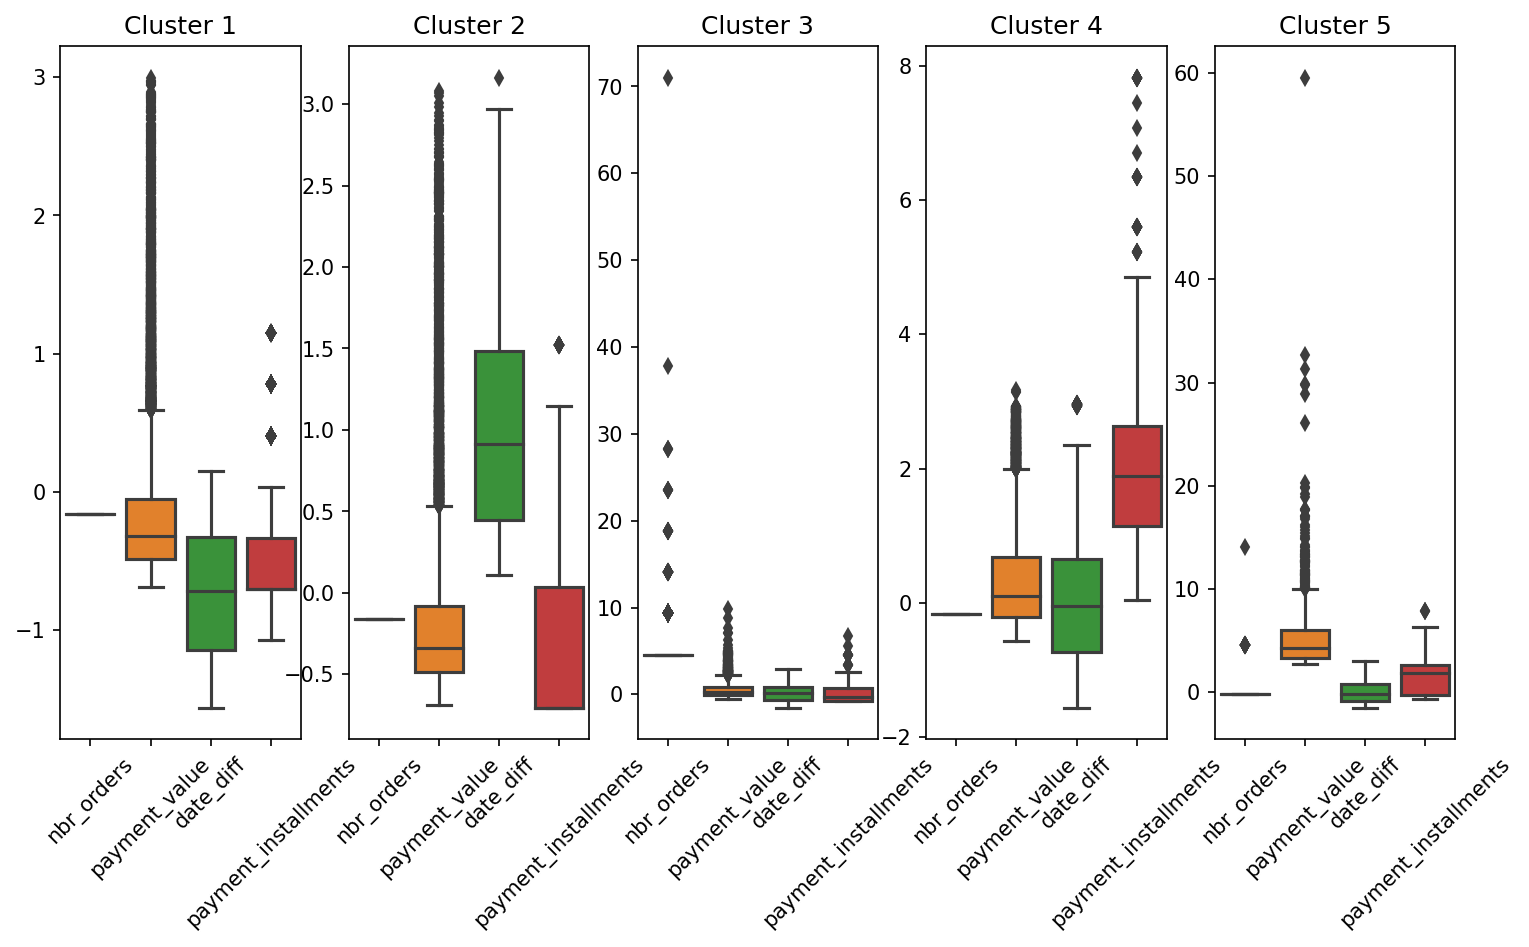

In [37]:
#Distribution des cluster 
plt.figure(figsize=(12, 6),dpi=150)

num_clusters=5
for i in range(num_clusters):
    plt.subplot(1, num_clusters, i + 1) 
    cluster_data = df_RFM_P[df_RFM_P['cluster'] == i][['nbr_orders', 'payment_value', 'date_diff','payment_installments']] 
    sns.boxplot(data=cluster_data) 
    plt.title(f'Cluster {i+1}') 
    plt.xticks(rotation=45)
plt.savefig('rfmPIs.png')
plt.show()


cluster 1 : Clients avec des montants d'achats faibles mais très régulièrement et avec un recours aux paiements échelonnés au tour de la moyenne.


cluster 2 : Clients avec des valeurs de paiement très élevées et très régulièrement et un recours aux paiements échelonnés  au tour de la moyenne.

cluster 3 : Clients avec des montants d'achats moyennes mais  régulièrement et avec un recours aux paiements échelonnés au tour de la moyenne.


cluster 4 : Clients avec des montants d'achats très faibles et très rarement et avec un recours aux paiements échelonnés réguliers.


cluster 5 : Clients avec des montants d'achats importants et régulièrement et avec un recours aux paiements échelonnés très réguliers.


#### CLUSTERING HIERARCHIQUE 

####  RFM

In [38]:
#prendre 10000div au hasard
df_CH = df_my_customer[['nbr_orders', 'payment_value', 'date_diff']]
df_CH=df_CH.sample(n=10000)

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram


scaler = StandardScaler()
scaler.fit(df_CH)
df_CH = scaler.transform(df_CH)

In [40]:
k_range= np.arange(2,10)
score= np.zeros(k_range.shape)

for k in k_range:
    agglo= AgglomerativeClustering(k)
    
    pred= agglo.fit_predict(df_CH)
    
    score[k-2]= silhouette_score(df_CH, pred)

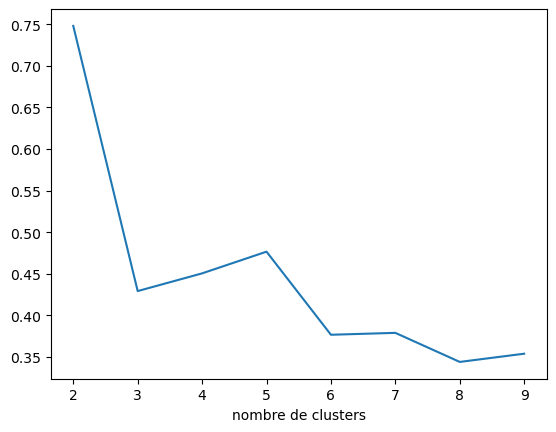

In [41]:
plt.plot(k_range, score)
plt.xlabel('nombre de clusters')
plt.show()

In [42]:
agglo= AgglomerativeClustering(3)

pred= agglo.fit_predict(df_CH)
silhouette_score(df_CH,pred)

0.42930449554946526

In [43]:

column_names =['nbr_orders', 'payment_value', 'date_diff']

df_CH = pd.DataFrame(df_CH,  columns=column_names)



df_CH['cluster']=pred


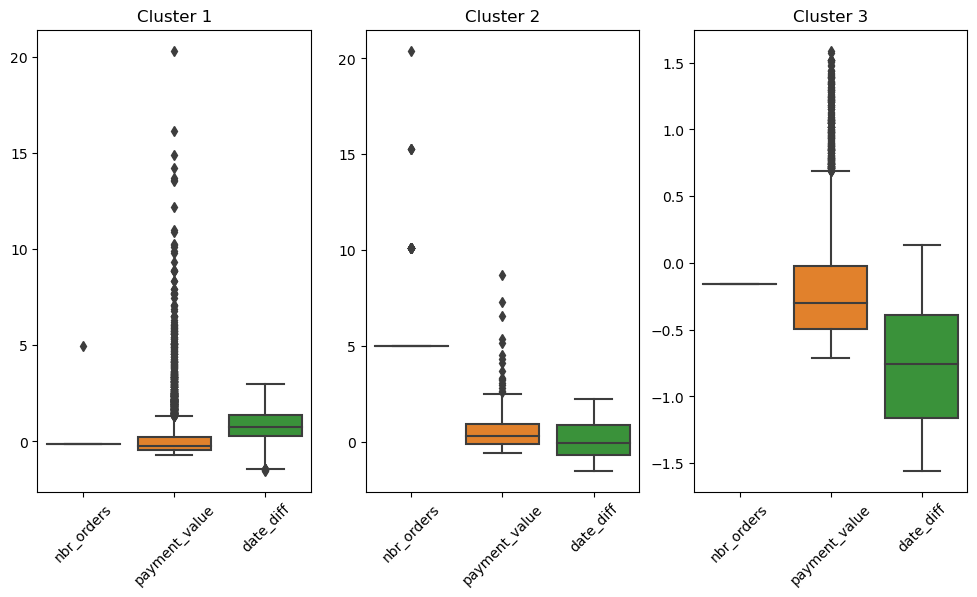

In [44]:
#Distribution des cluster 
plt.figure(figsize=(12, 6),dpi=100)

num_clusters=3
for i in range(num_clusters):
    plt.subplot(1, num_clusters, i + 1) 
    cluster_data = df_CH[df_CH['cluster'] == i][['nbr_orders', 'payment_value', 'date_diff']] 
    sns.boxplot(data=cluster_data)
    plt.xticks(rotation=45)
    plt.title(f'Cluster {i+1}') 
plt.savefig('agglo.png')
plt.show()

cluster 1 = clients avec achats de montants moyens mais très régulièrement 

cluster 2 = clients ayant fait plusieurs commandes avec achats de montants importants et souvent.

cluster 3 = clients avec peu d'achat et rarement.

===> résultats assez semblable à ceux obtenu avec le Kmeans.

### DBSCAN

In [52]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN


In [53]:
df_db = df_my_customer[['nbr_orders', 'payment_value', 'date_diff']]


In [54]:
scaler= StandardScaler().fit(df_db)
df=scaler.transform(df_db)



In [55]:
db=DBSCAN(eps=0.5,min_samples=100)
pred= db.fit_predict(df_db)


In [56]:
np.unique(pred)

array([-1], dtype=int64)

===> 1 seul cluster 
===> modèle pas adapté
===> uniquement 3% de données sont utiles pour le groupement
==> PAR DENSTIT2

In [57]:
db=DBSCAN(eps=0.3,min_samples=100)
pred= db.fit_predict(df_db)


In [58]:
np.unique(pred)

array([-1], dtype=int64)

In [59]:
np.unique(pred)

array([-1], dtype=int64)

In [60]:
db=DBSCAN(eps=0.01,min_samples=5)
pred= db.fit_predict(df_db)

In [61]:
np.unique(pred)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57], dtype=int64)